In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# بارگذاری داده‌ها
iris = pd.read_csv('C:/Users/A.S.T.co/Downloads/iris.csv')

# بررسی داده‌ها
print(iris.head())
print(iris.describe())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


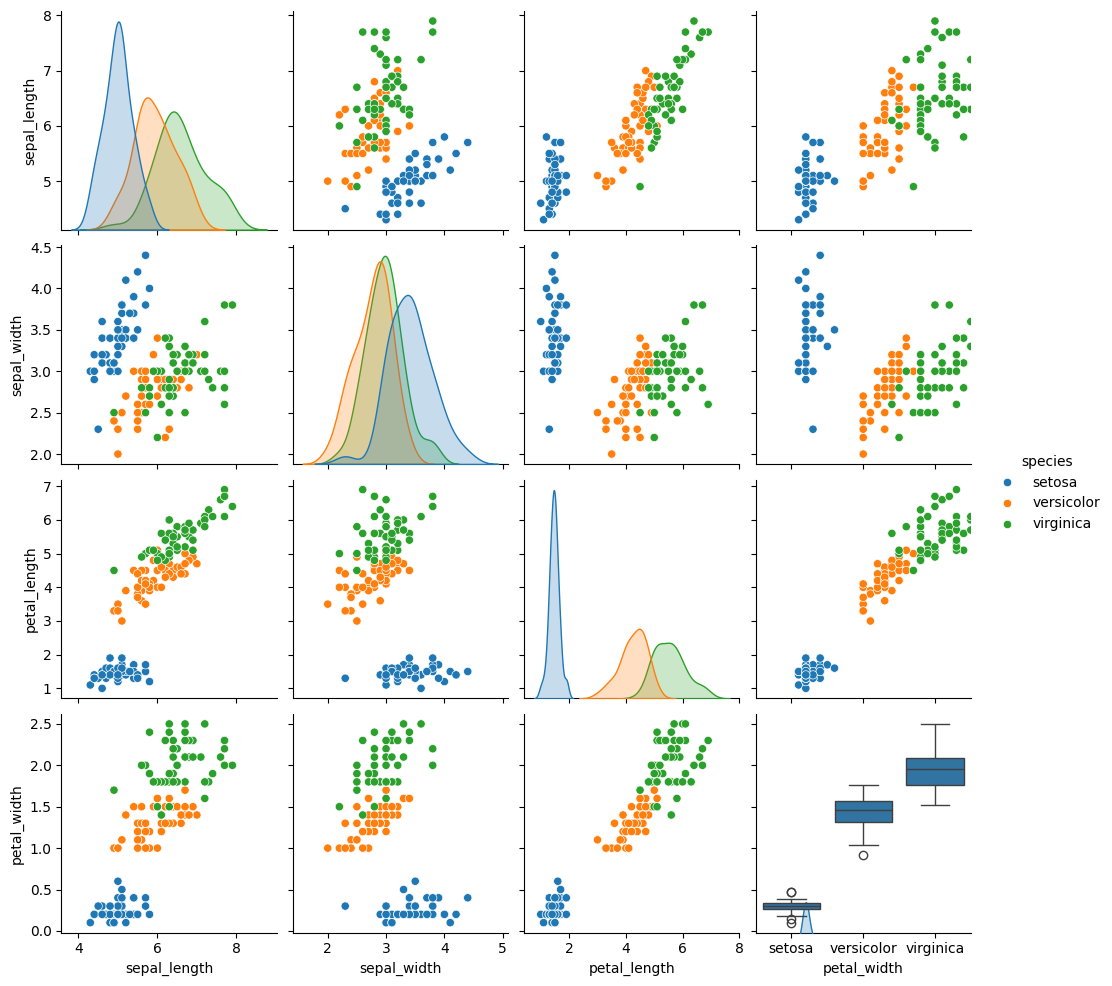

In [2]:
# ترسیم نمودار جفتی
sns.pairplot(iris, hue='species')

# ترسیم boxplot برای petal_length بر اساس species
sns.boxplot(x='species', y='petal_length', data=iris)

# تعداد نمونه‌های هر کلاس
print(iris['species'].value_counts())


In [3]:
# جداسازی ویژگی‌ها و برچسب‌ها
x = iris.iloc[:, :4]  # ویژگی‌ها
y = iris.iloc[:, 4]   # برچسب‌ها
print(x)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [4]:
# تبدیل برچسب‌ها به اعداد (Label Encoding)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# ساخت مدل شبکه عصبی با استفاده از Keras
model = Sequential()

# لایه ورودی با 4 نورون (ویژگی‌های ورودی)
model.add(Dense(10, input_dim=4, activation='relu'))

# لایه پنهان با 10 نورون
model.add(Dense(10, activation='relu'))

# لایه خروجی با 3 نورون (برای سه کلاس species)
model.add(Dense(3, activation='softmax'))

c:\Users\A.S.T.co\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# کامپایل کردن مدل
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# آموزش مدل
model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3473 - loss: 1.2468  
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4959 - loss: 1.1249 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5791 - loss: 1.0423 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5776 - loss: 0.9955 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7055 - loss: 0.9565 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6346 - loss: 0.9406 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7002 - loss: 0.8917 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7274 - loss: 0.8339 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6918 - loss: 0.8556 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7106 - loss: 0.8107 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6733 - loss: 0.8140 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [7]:
# پیش‌بینی با استفاده از مدل شبکه عصبی
y_pred_nn = model.predict(x_test)
y_pred_nn = y_pred_nn.argmax(axis=1)  # تبدیل به برچسب‌ها
print(y_pred_nn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [8]:
# ارزیابی مدل شبکه عصبی
print("\nConfusion Matrix for Neural Network:")
print(confusion_matrix(y_test, y_pred_nn))
accuracy_nn = accuracy_score(y_test, y_pred_nn) * 100
print("Accuracy of Neural Network: {:.2f}%".format(accuracy_nn))
print("\nClassification Report for Neural Network:")
print(classification_report(y_test, y_pred_nn))


Confusion Matrix for Neural Network:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy of Neural Network: 100.00%

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [9]:
# پیش‌بینی برای داده‌های جدید
X_new = np.array([[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9]])
X_new

array([[3. , 2. , 1. , 0.2],
       [4.9, 2.2, 3.8, 1.1],
       [5.3, 2.5, 4.6, 1.9]])

In [10]:
# پیش‌بینی با مدل شبکه عصبی
prediction_nn = model.predict(X_new)
prediction_nn = prediction_nn.argmax(axis=1)
prediction_nn

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([0, 1, 2])

In [11]:
# تبدیل برچسب‌های عددی به برچسب‌های واقعی
prediction_labels = label_encoder.inverse_transform(prediction_nn)
print("\nPrediction of Species for new samples: {}".format(prediction_labels))



Prediction of Species for new samples: ['setosa' 'versicolor' 'virginica']


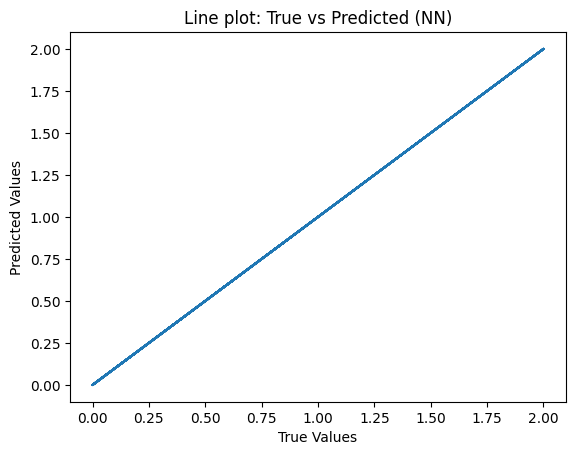

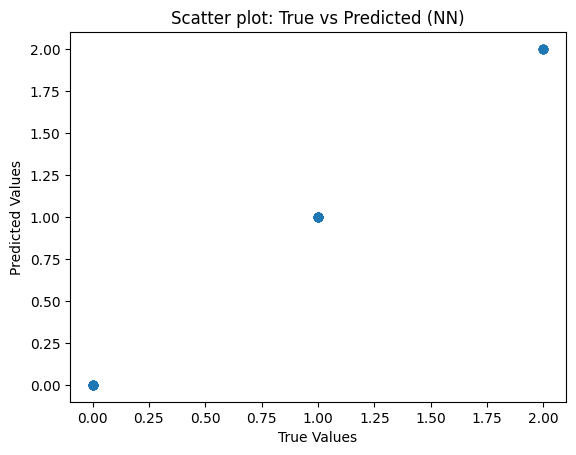

In [12]:
# رسم نمودارهای مختلف برای پیش‌بینی‌ها



# اطمینان از اینکه y_test یک numpy array است
if isinstance(y_test, pd.Series):  
    y_test = y_test.to_numpy()
elif isinstance(y_test, pd.DataFrame):  
    y_test = y_test.values  # تبدیل به numpy array اگر DataFrame باشد

# رسم نمودار خطی برای مقایسه true vs predicted
plt.plot(y_test, y_pred_nn)
plt.title("Line plot: True vs Predicted (NN)")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

# رسم نمودار پراکندگی برای مقایسه true vs predicted
plt.scatter(y_test, y_pred_nn)
plt.title("Scatter plot: True vs Predicted (NN)")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()